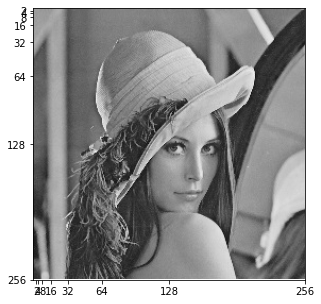

uint8
(256, 256, 3)


In [1]:
# Python program to read image using matplotlib 

import matplotlib.image as img 
import matplotlib.pyplot as plt
import numpy as np
  
# Read Images 
image = img.imread('Lena.jpg')
  
# Output Images
plt.figure(figsize=(5,5))
plt.imshow(image[:,:,0], cmap='gray', vmin=0, vmax=255)#, interpolation='none')
#plt.rcParams['image.cmap'] = 'gray' #blanco y negro
#plt.rcParams['image.cmap'] = 'viridis' #default
plt.xticks([2**i for i in range(1,9)])
plt.yticks([2**i for i in range(1,9)])
plt.show()
print(image.dtype)
print(image.shape)

In [2]:
a = image[:10,:10,2]
print(a) #La 3ra entrada puede ser 0,1,2 pero los 3 son iguales

[[161 161 155 163 163 159 165 155 156 161]
 [163 159 157 160 160 159 160 154 154 161]
 [162 157 159 158 158 160 155 152 152 158]
 [158 156 158 157 157 158 153 150 153 154]
 [156 158 155 155 157 156 155 151 157 152]
 [156 159 153 153 155 155 157 155 158 151]
 [156 158 156 152 155 158 155 157 156 154]
 [156 156 160 153 156 162 152 157 154 157]
 [157 155 156 150 162 157 157 156 155 156]
 [153 156 156 159 152 155 155 157 157 155]]


In [6]:
I = image[:,:,1]
I.shape

(600, 600)

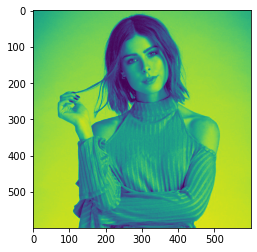

In [7]:
plt.imshow(I)
plt.show()

In [8]:
c0 = []
c1 = []

for i in range(I.shape[1]):
    
    string = np.binary_repr(I[0,i], 8)
    c0 += [int(bit) for bit in string]
    
    string = np.binary_repr(I[1,i], 8)
    c1 += [int(bit) for bit in string]
    
print( len(c0), ',', len(c1) )

4800 , 4800


In [9]:
λ_1 = 1
λ0  = 0
λ1  = 1

In [10]:
c2 = []
n = len(c0)-1
for i in range(n):
    c2.append((c0[i] + λ_1*c1[i-1] + λ0*c1[i] + λ1*c1[i+1])%2) #Regla de actualización, c1[i-1] = c1[-1] para i=0
c2.append((c0[n] + λ_1*c1[n-1] + λ0*c1[n] + λ1*c1[0])%2) #Último elemento con condiciones periódicas
len(c2)

4800

In [11]:
c2[:26]

[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]

In [12]:
T = 5
n = len(c0)-1

cT_2 = c0.copy()
cT_1 = c1.copy()
cT = []

for j in range(T):
    for i in range(n):
        cT.append((cT_2[i] + λ_1*cT_1[i-1] + λ0*cT_1[i] + λ1*cT_1[i+1])%2) #Regla de actualización, c1[i-1] = c1[-1] para i=0
    cT.append((cT_2[n] + λ_1*cT_1[n-1] + λ0*cT_1[n] + λ1*cT_1[0])%2) #Último elemento con condiciones periódicas
    print(len(cT), cT[:10])
    
    cT_2 = cT_1.copy()
    cT_1 = cT.copy()
    cT = []

4800 [1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
4800 [0, 1, 0, 0, 1, 1, 1, 1, 1, 1]
4800 [0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
4800 [0, 0, 1, 0, 0, 0, 1, 1, 1, 1]
4800 [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]


In [13]:
cT_2[:8]

[0, 0, 1, 0, 0, 0, 1, 1]

In [14]:
int('111100',2)

60

In [16]:
int('100011',2)

35

In [15]:
num = 0
for i in range(8):
    num += cT_2[i]*2**(7-i)
num

35

In [17]:
I.shape[0]//8

75

In [18]:
rT_2 = []
rT_1 = []
for j in range(0,len(cT_2),8):
    num0 = 0
    num1 = 0
    for i in range(8):
        num0 += cT_2[i+j]*2**(7-i)
        num1 += cT_1[i+j]*2**(7-i)
    rT_2.append(num0)
    rT_1.append(num1)
len(rT_2),len(rT_1)

(600, 600)

In [19]:
rT_2[:17]

[35, 198, 19, 118, 230, 230, 236, 70, 61, 19, 51, 214, 221, 201, 102, 166, 150]

In [20]:
rT_1[:16]

[187, 40, 83, 113, 185, 185, 172, 232, 39, 162, 194, 48, 86, 63, 152, 136]

In [21]:
np.shape([rT_2, rT_1])

(2, 600)

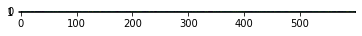

In [22]:
plt.imshow([rT_2, rT_1])

In [23]:
cT_2 = []
cT_1 = []

for j in range(0,I.shape[0],2):
    for i in range(I.shape[1]):

        string = np.binary_repr(I[j,i], 8)
        cT_2 += [int(bit) for bit in string]

        string = np.binary_repr(I[j+1,i], 8)
        cT_1 += [int(bit) for bit in string]

In [34]:
def cifrado(T, λ_1=1, λ0=0, λ1=1): #T es el número de iteraciones
    J = []
    for k in range(0,I.shape[0],2):
        n = len(c0)-1

        cT_2 = []
        cT_1 = []
        for i in range(I.shape[1]):

            string = np.binary_repr(I[k,i], 8)
            cT_2 += [int(bit) for bit in string]

            string = np.binary_repr(I[k+1,i], 8)
            cT_1 += [int(bit) for bit in string]

        cT = []

        for j in range(T):
            for i in range(n):
                cT.append((cT_2[i] + λ_1*cT_1[i-1] + λ0*cT_1[i] + λ1*cT_1[i+1])%2) #Regla de actualización, c1[i-1] = c1[-1] para i=0
            cT.append((cT_2[n] + λ_1*cT_1[n-1] + λ0*cT_1[n] + λ1*cT_1[0])%2) #Último elemento con condiciones periódicas
            cT_2 = cT_1.copy()
            cT_1 = cT.copy()
            cT = []

        rT_2 = []
        rT_1 = []
        for j in range(0,len(cT_2),8):
            num0 = 0
            num1 = 0
            for i in range(8):
                num0 += cT_2[i+j]*2**(7-i)
                num1 += cT_1[i+j]*2**(7-i)
            rT_2.append(num0)
            rT_1.append(num1)

        J.append(rT_2)
        J.append(rT_1)

    img.imsave('J.jpg',J)
    plt.imshow(J)
    plt.title('T={}'.format(T))
    plt.axis('off')
    #plt.show()

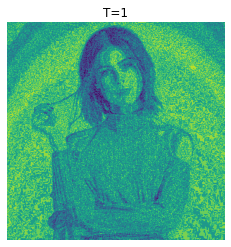

In [27]:
cifrado(1)

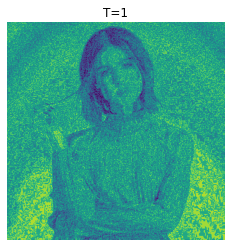

In [25]:
cifrado(1)

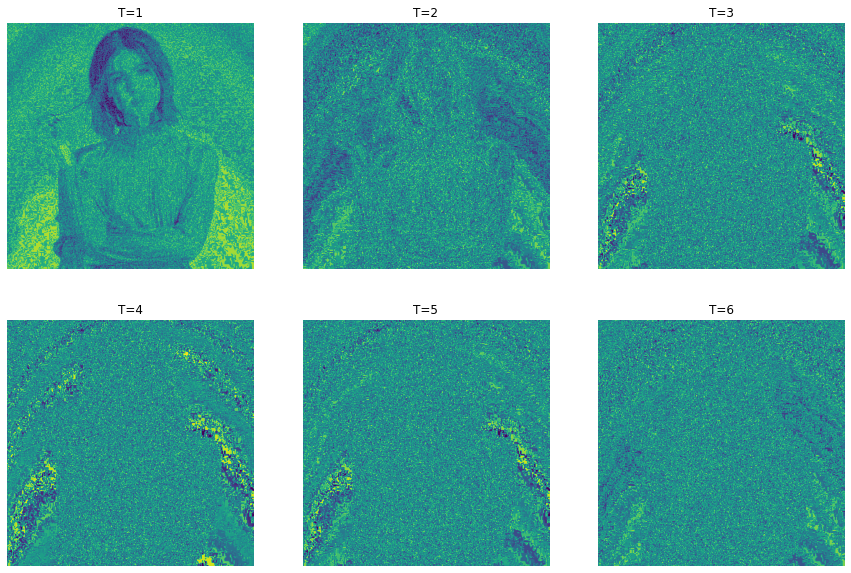

In [30]:
plt.figure(figsize=(15,10))

plt.subplot(231)
cifrado(1)

plt.subplot(232)
cifrado(2)

plt.subplot(233)
cifrado(3)

plt.subplot(234)
cifrado(4)

plt.subplot(235)
cifrado(5)

plt.subplot(236)
cifrado(6)

plt.show()

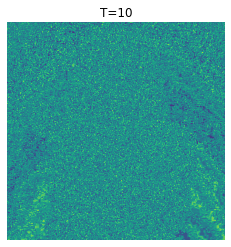

In [36]:
cifrado(10,1,0,1)

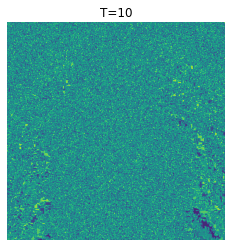

In [37]:
cifrado(10,1,1,1)

uint8
(600, 600, 3)


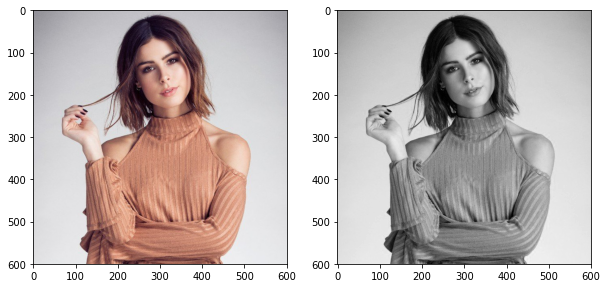

In [1]:
# Python program to read image using matplotlib 

import matplotlib.image as img 
import matplotlib.pyplot as plt
import numpy as np
  
# Read Images 
image = img.imread('Lena_Meyer-Landrut.jpg')

print(image.dtype)
print(image.shape)

# Output Images
plt.figure(figsize=(10,5))
#plt.subplots_adjust(wspace=0.4)
plt.subplot(121)
plt.imshow(image)
plt.xticks(range(0,601,100))
plt.yticks(range(0,601,100))

plt.subplot(122)
plt.imshow(image[:,:,1], cmap='gray', vmin=0, vmax=255)#, interpolation='none')
          #image[:,:,0] is whiter and image[:,:,2] is darker
#plt.rcParams['image.cmap'] = 'binary' #blanco y negro
#plt.rcParams['image.cmap'] = 'viridis' #default
plt.xticks(range(0,601,100))
plt.yticks(range(0,601,100))

plt.show()

(600, 600)

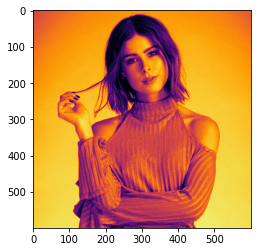

In [24]:
I = image[:,:,1]
plt.rcParams['image.cmap'] = 'inferno'
plt.imshow(I)
I.shape

(600, 600)

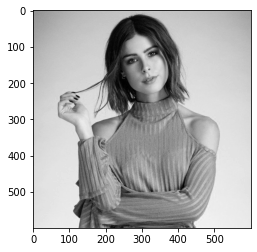

In [25]:
I = image[:,:,1]
plt.rcParams['image.cmap'] = 'gray'
plt.imshow(I)
I.shape

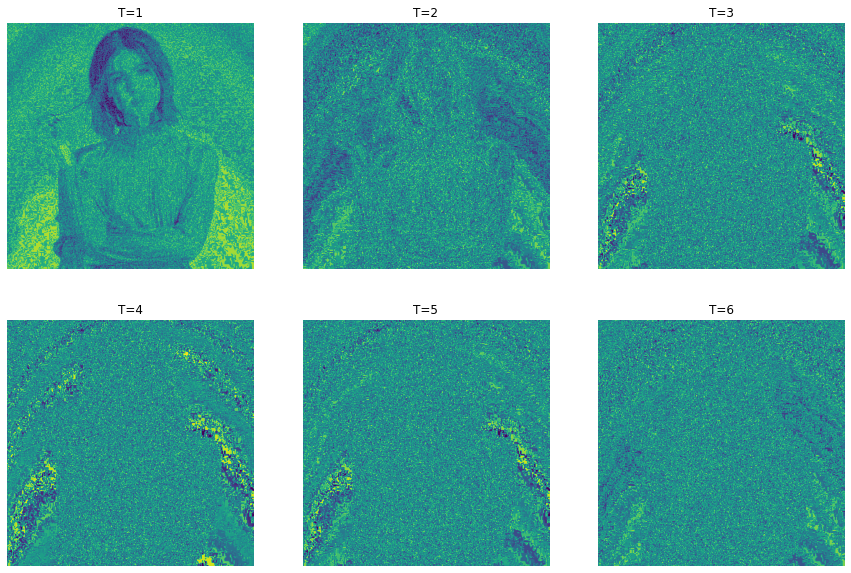

In [31]:
plt.figure(figsize=(15,10))

plt.subplot(231)
cifrado(1)

plt.subplot(232)
cifrado(2)

plt.subplot(233)
cifrado(3)

plt.subplot(234)
cifrado(4)

plt.subplot(235)
cifrado(5)

plt.subplot(236)
cifrado(6)

plt.show()

In [ ]:
def descifrado(T): #T es el número de iteraciones
    J = []
    for k in range(0,I.shape[0],2):
        n = len(c0)-1

        cT_2 = []
        cT_1 = []
        for i in range(I.shape[1]):

            string = np.binary_repr(I[k,i], 8)    #Renglón 0
            cT_2 += [int(bit) for bit in string]

            string = np.binary_repr(I[k+1,i], 8)  #Renglón 1
            cT_1 += [int(bit) for bit in string]

        cT = []

        for j in range(T):
            for i in range(n):
                cT.append((cT_2[i] + λ_1*cT_1[i-1] + λ0*cT_1[i] + λ1*cT_1[i+1])%2) #Regla de actualización
            cT.append((cT_2[n] + λ_1*cT_1[n-1] + λ0*cT_1[n] + λ1*cT_1[0])%2) #Último elemento con condiciones periódicas
            cT_2 = cT_1.copy()
            cT_1 = cT.copy()
            cT = []

        rT_2 = []
        rT_1 = []
        for j in range(0,len(cT_2),8):
            num0 = 0
            num1 = 0
            for i in range(8):
                num0 += cT_2[i+j]*2**(7-i)
                num1 += cT_1[i+j]*2**(7-i)
            rT_2.append(num0)
            rT_1.append(num1)

        J.append(rT_2)
        J.append(rT_1)

    plt.imshow(J)
    plt.title('T={}'.format(T))
    plt.axis('off')
    #plt.show()

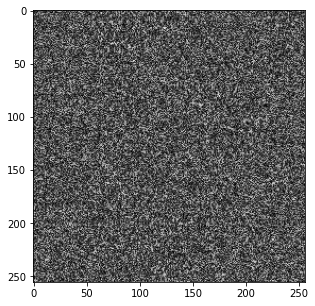

uint8
(256, 256, 3)


In [27]:
# Python program to read image using matplotlib 

import matplotlib.image as img 
import matplotlib.pyplot as plt
import numpy as np
  
# Read Images 
image = img.imread('J.jpg')
  
# Output Images
plt.figure(figsize=(5,5))
plt.imshow(image[:,:,0], cmap='gray', vmin=0, vmax=255)#, interpolation='none')
#plt.rcParams['image.cmap'] = 'binary' #blanco y negro
#plt.rcParams['image.cmap'] = 'viridis' #default
#plt.xticks([2**i for i in range(1,9)])
#plt.yticks([2**i for i in range(1,9)])
plt.show()
print(image.dtype)
print(image.shape)

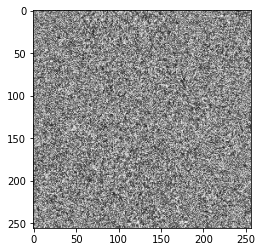

In [28]:
I = image[:,:,1]
I.shape
#plt.rcParams['image.cmap'] = 'inferno'
plt.imshow(I)
plt.show()